In [ ]:
!pip install prov[dot]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 421 kB 5.6 MB/s 
     |████████████████████████████████| 500 kB 50.2 MB/s 
     |████████████████████████████████| 41 kB 407 kB/s 


In [ ]:
import prov.model as prov
from prov.model import ProvDocument
d1 = ProvDocument()  # d1 is now an empty provenance document

In [ ]:
from prov.model import ProvDocument

In [ ]:
# Declaring namespaces for various prefixes 
d1.add_namespace('prov', 'http://www.w3.org/ns/prov#')
d1.add_namespace('foaf', 'http://xmlns.com/foaf/0.1/')
d1.add_namespace('dcterms', 'http://purl.org/dc/terms/')
d1.add_namespace('base', 'http://www.RDorg.it/')
d1.add_namespace('user', 'http://www.RDorg.it/people/')
d1.add_namespace('user_roles','http://www.RDorg.it/roles/')

<Namespace: user_roles {http://www.RDorg.it/roles/}>

In [ ]:
#Declaring entities
e1 = d1.entity ('base:Sample')
e2 = d1.entity ('base:Registered_sample')
e3 = d1.entity ('base:Libraries_readyforSeq')
e4 = d1.entity ('base:BCL_raw_data')
e5 = d1.entity ('base:FASTQ_files')
e6 = d1.entity ('base:BAM_file')
e7 = d1.entity ('base:VCF_file')
e8 = d1.entity ('base:Tertiary_analysis_result')

#Protocols described as entity type "plan"
e9 = d1.entity ('base:Sample_sheet', {'prov:type':'Plan'})
e10 = d1.entity ('base:Extraction_protocol', {'prov:type':'Plan'})
e11 = d1.entity ('base:Library_preaparation_protocol', {'prov:type':'Plan'})
#The raw data and FASTQ storages as collection
e12 = d1.entity ('base:Raw_data_database', {'prov:type':'Collection'})
e13 = d1.entity ('base:FASTQ_database', {'prov:type':'Collection'})
d1.hadMember (e12, e4)
d1.hadMember (e13, e5)

<ProvMembership: (base:FASTQ_database, base:FASTQ_files)>

In [ ]:
#Declaring agents
ag1 = d1.agent ('user:Research_center', {'prov:type':'Organization', 'foaf:name':"CRS4"})
ag2 = d1.agent ('user:Service_requesting_user', {'prov:type':'Organization'})
ag3 = d1.agent ('user:Operator_1', {'prov:type':'Person', 'prov:role':'NGS laboratory operator'})
ag4 = d1.agent ('user:Operator_2', {'prov:type':'Person', 'prov:role':'Bioinformatics laboratory operator'})
d1.actedOnBehalfOf (ag1, ag2)
d1.actedOnBehalfOf (ag3, ag1)
d1.actedOnBehalfOf (ag4, ag1)

<ProvDelegation: (user:Operator_2, user:Research_center)>

In [ ]:
a1 = d1.activity ('base:Sample_registration')
a2 = d1.activity ('base:Sample_processing')
a3 = d1.activity ('base:Sample_sheet_preparation')
a4 = d1.activity ('base:Sequencing')
a5 = d1.activity ('base:BCL_storage')
a6 = d1.activity ('base:Primary_sequencing_analysis')
a7 = d1.activity ('base:FASTQ_storage')
a8 = d1.activity ('base:Secondary_analysis')
a9 = d1.activity ('base:Tertiary_analysis')

In [ ]:
#Declaring usage
d1.used (a1, e1)
d1.used (a2, e2)
d1.used (a4, e3)
d1.used (a4, e9)
d1.used (a5, e4)
d1.used (a6, e4)
d1.used (a7, e5)
d1.used (a8, e5)
d1.used (a8, e6) 
d1.used (a9, e7)
d1.used (a2, e10)
d1.used (a2, e11)

<ProvUsage: (base:Sample_processing, base:Library_preaparation_protocol)>

In [ ]:
#Declaring generation
d1.wasGeneratedBy (e2, a1)
d1.wasGeneratedBy (e3, a2)
d1.wasGeneratedBy (e4, a4)
d1.wasGeneratedBy (e5, a6)
d1.wasGeneratedBy (e9, a3)
d1.wasGeneratedBy (e6, a8)
d1.wasGeneratedBy (e7, a8)
d1.wasGeneratedBy (e8, a9)
d1.wasGeneratedBy (e12, a5)
d1.wasGeneratedBy (e13, a7)

<ProvGeneration: (base:FASTQ_database, base:FASTQ_storage)>

In [ ]:
#Declaring association
d1.wasAssociatedWith (a1, ag3)
d1.wasAssociatedWith (a2, ag3)
d1.wasAssociatedWith (a3, ag3)
d1.wasAssociatedWith (a4, ag3)
d1.wasAssociatedWith (a5, ag3)
d1.wasAssociatedWith (a6, ag4)
d1.wasAssociatedWith (a7, ag4)
d1.wasAssociatedWith (a8, ag4)
d1.wasAssociatedWith (a9, ag4)

<ProvAssociation: (base:Tertiary_analysis, user:Operator_2)>

In [ ]:
#Declaring attribution
d1.wasAttributedTo (e1, ag2)
d1.wasAttributedTo (e2, ag3)
d1.wasAttributedTo (e3, ag3)
d1.wasAttributedTo (e4, ag3)
d1.wasAttributedTo (e9, ag3)
d1.wasAttributedTo (e6, ag4)
d1.wasAttributedTo (e7, ag4)
d1.wasAttributedTo (e8, ag4)
d1.wasAttributedTo (e12, ag4)
d1.wasAttributedTo (e13, ag4)

<ProvAttribution: (base:FASTQ_database, user:Operator_2)>

In [ ]:
#Declaring derivation
d1.wasDerivedFrom (e5, e4)
d1.wasDerivedFrom (e6, e5)
d1.wasDerivedFrom (e7, e6)

<ProvDerivation: (base:VCF_file, base:BAM_file)>

In [ ]:
# visualize the graph
from prov.dot import prov_to_dot
dot = prov_to_dot(d1)
dot.write_png('IlluminaWGS.png')

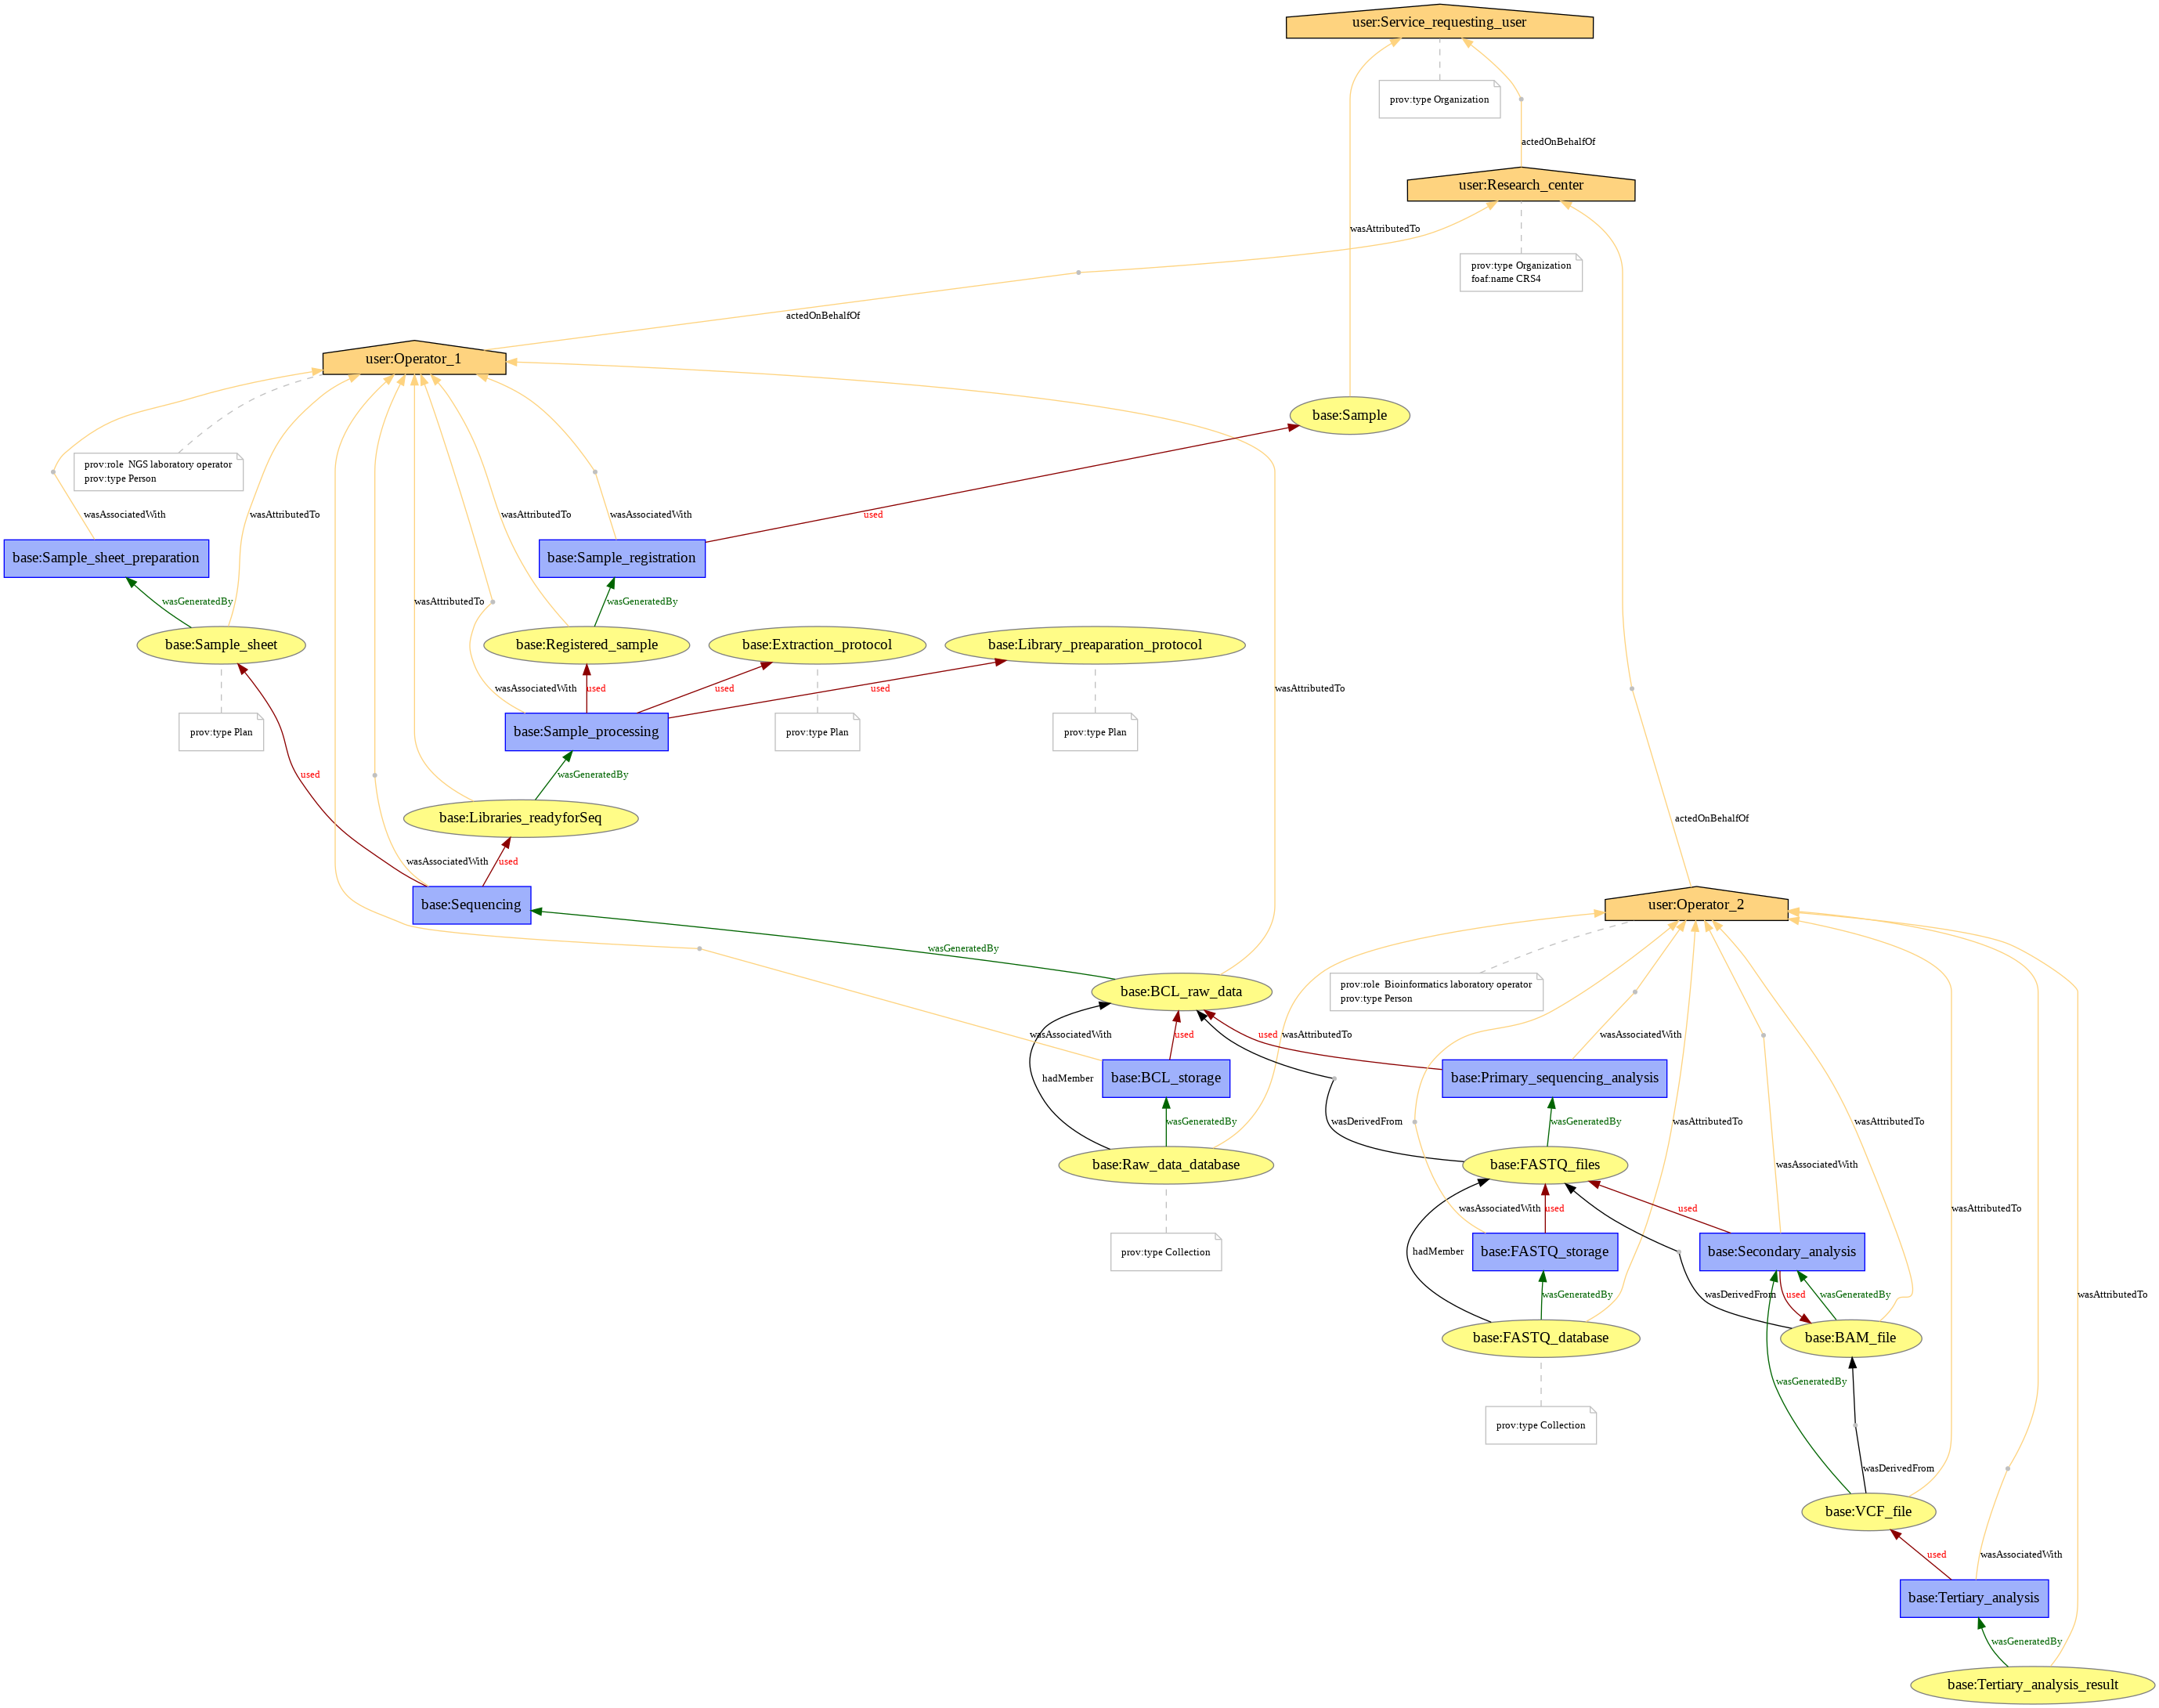

In [ ]:
# visualize the image
from IPython.display import Image 
Image('IlluminaWGS.png')

In [ ]:
print(d1.get_provn())

document
  prefix foaf <http://xmlns.com/foaf/0.1/>
  prefix dcterms <http://purl.org/dc/terms/>
  prefix base <http://www.RDorg.it/>
  prefix user <http://www.RDorg.it/people/>
  prefix user_roles <http://www.RDorg.it/roles/>
  
  entity(base:Sample)
  entity(base:Registered_sample)
  entity(base:Libraries_readyforSeq)
  entity(base:BCL_raw_data)
  entity(base:FASTQ_files)
  entity(base:BAM_file)
  entity(base:VCF_file)
  entity(base:Tertiary_analysis_result)
  entity(base:Sample_sheet, [prov:type="Plan"])
  entity(base:Extraction_protocol, [prov:type="Plan"])
  entity(base:Library_preaparation_protocol, [prov:type="Plan"])
  entity(base:Raw_data_database, [prov:type="Collection"])
  entity(base:FASTQ_database, [prov:type="Collection"])
  hadMember(base:Raw_data_database, base:BCL_raw_data)
  hadMember(base:FASTQ_database, base:FASTQ_files)
  agent(user:Research_center, [prov:type="Organization", foaf:name="CRS4"])
  agent(user:Service_requesting_user, [prov:type="Organization"])
  ag

In [ ]:
#Turtle (PROV-O)
d1.serialize('IlluminaWGS.ttl', format='rdf', rdf_format='ttl')

In [ ]:
#XML (PROV-XML)
d1.serialize('IlluminaWGS.xml', format='xml')